In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv("error_message.csv")
df1.head(5)  

,메세지,발생시간,조치시간,정지시간,정지시간2,모델,제품두께,제품싸이즈,작업구분,작업자,온도,습도
0,e-CIM 관련에러,2015-06-17T07:32:42,2015-06-17T07:32:54,0시 00분 12초,11.970,78FBGA 7.5x11 CGHB08154 REV.1,0.25,415-515,야간,이은미,22.5,47.3
1,Door Open,2015-06-17T07:32:42,2015-06-17T07:32:54,0시 00분 12초,11.970,78FBGA 7.5x11 CGHB08154 REV.1,0.25,415-515,야간,이은미,22.5,47.3
2,롯트 종료,2015-06-17T07:33:00,2015-06-17T07:33:05,0시 00분 04초,4.093,78FBGA 7.5x11 CGHB08154 REV.2,1.25,415-516,야간,이은미,22.5,47.3


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2792 entries, 0 to 2791
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   메세지     2792 non-null   object 
 1   발생시간    2792 non-null   object 
 2   조치시간    2792 non-null   object 
 3   정지시간    2792 non-null   object 
 4   정지시간2   2792 non-null   float64
 5   모델      1112 non-null   object 
 6   제품두께    1112 non-null   object 
 7   제품싸이즈   1112 non-null   object 
 8   작업구분    2792 non-null   object 
 9   작업자     1112 non-null   object 
 10  온도      2792 non-null   float64
 11  습도      2792 non-null   float64
dtypes: float64(3), object(9)
memory usage: 261.9+ KB


In [4]:
df1.dtypes

메세지       object
발생시간      object
조치시간      object
정지시간      object
정지시간2    float64
모델        object
제품두께      object
제품싸이즈     object
작업구분      object
작업자       object
온도       float64
습도       float64
dtype: object

In [5]:
df1.describe()


,정지시간2,온도,습도
count,2792.000000,2792.0,2.792000e+03
mean,73.133777,22.5,4.730000e+01
std,490.559231,0.0,1.954343e-12
min,1.391000,22.5,4.730000e+01
25%,6.015000,22.5,4.730000e+01
50%,11.956000,22.5,4.730000e+01
75%,29.254250,22.5,4.730000e+01
max,12863.000000,22.5,4.730000e+01


In [6]:
df1['메세지'].unique()

array(['e-CIM 관련에러', 'Door Open', '롯트 종료', '자재 픽업 에러', '비젼 가동 준비 Error',
       '타임 오버', 'SYSTEM HANG UP', '초기화 Error', '메가진 Full', 'ITS 데이터',
       '드라이버 알람', '비젼 데이터', '컨드롤러 알람'], dtype=object)

In [7]:
# 해당 범주형 데이터의 빈도 수 
df1['메세지'].value_counts()

Door Open         1345
자재 픽업 에러           425
비젼 가동 준비 Error     234
롯트 종료              229
초기화 Error          215
e-CIM 관련에러         133
메가진 Full           119
타임 오버               45
SYSTEM HANG UP      35
비젼 데이터               6
ITS 데이터              3
드라이버 알람              2
컨드롤러 알람              1
Name: 메세지, dtype: int64

In [8]:
# 범주형 데이터에 대해 요약 통계량 확인
df1.describe(include = "object")

,메세지,발생시간,조치시간,정지시간,모델,제품두께,제품싸이즈,작업구분,작업자
count,2792,2792,2792,2792,1112,1112,1112,2792,1112
unique,13,2791,2791,283,62,45,21,2,7
top,Door Open,2015-06-17T07:32:42,2015-06-17T07:32:54,0시 00분 06초,GU1413F,0.21,415-515,주간,최이슬
freq,1345,2,2,307,102,214,812,1466,453


** 데이터 핸들링 **
- 정렬 : df1.sort_valuse(by = 'col')
- 추출 :
    -행단위 : df1.iloc[__] / df1.head() / df1.tail()
    -열단위 :df1[] /df1[[]]
- 필터 : df1.loc[조건식]
- 요약 : 

In [9]:
# 데이터 정렬 (오름차순)
df1.sort_values(by='정지시간2')

,메세지,발생시간,조치시간,정지시간,정지시간2,모델,제품두께,제품싸이즈,작업구분,작업자,온도,습도
67,Door Open,2015-06-17T09:35:26,2015-06-17T09:35:28,0시 00분 01초,1.391,(BGA) 54-50-03786-DT-R1F-37,6.13,415-520,주간,임내순,22.5,47.3
565,Door Open,2015-06-18T10:13:16,2015-06-18T10:13:18,0시 00분 02초,1.859,NaN,NaN,NaN,주간,NaN,22.5,47.3
1056,자재 픽업 에러,2015-06-19T14:16:51,2015-06-19T14:16:52,0시 00분 02초,1.859,NaN,NaN,NaN,주간,NaN,22.5,47.3
13,Door Open,2015-06-17T07:45:47,2015-06-17T07:45:48,0시 00분 02초,1.874,78FBGA 7.5x11 CGHB08154 REV.13,12.25,415-527,야간,이은미,22.5,47.3
151,초기화 Error,2015-06-17T15:02:23,2015-06-17T15:02:25,0시 00분 02초,1.891,NaN,NaN,NaN,주간,NaN,22.5,47.3
...,...,...,...,...,...,...,...,...,...,...,...,...
807,Door Open,2015-06-18T22:00:44,2015-06-18T23:39:23,1시 38분 39초,5918.700,038072E A(R001-9116U)(ITS-A)(update strip),0.38,415-515,야간,장다혜,22.5,47.3
2100,Door Open,2015-06-22T11:41:40,2015-06-22T13:47:15,2시 05분 35초,7535.100,NaN,NaN,NaN,주간,NaN,22.5,47.3
2167,Door Open,2015-06-22T17:40:15,2015-06-22T20:04:06,2시 23분 51초,8630.500,NaN,NaN,NaN,주간,NaN,22.5,47.3
1771,초기화 Error,2015-06-21T12:32:16,2015-06-21T16:05:44,3시 33분 28초,12808.000,FCCSP597MLA REV.1(ETP)(ITS-A),0.15,417-518,주간,박상훈,22.5,47.3


In [10]:
df1.sort_values(by='정지시간2',ascending=False)

,메세지,발생시간,조치시간,정지시간,정지시간2,모델,제품두께,제품싸이즈,작업구분,작업자,온도,습도
1533,초기화 Error,2015-06-20T17:58:25,2015-06-20T21:32:48,3시 34분 23초,12863.000,NaN,NaN,NaN,야간,NaN,22.5,47.3
1771,초기화 Error,2015-06-21T12:32:16,2015-06-21T16:05:44,3시 33분 28초,12808.000,FCCSP597MLA REV.1(ETP)(ITS-A),0.15,417-518,주간,박상훈,22.5,47.3
2167,Door Open,2015-06-22T17:40:15,2015-06-22T20:04:06,2시 23분 51초,8630.500,NaN,NaN,NaN,주간,NaN,22.5,47.3
2100,Door Open,2015-06-22T11:41:40,2015-06-22T13:47:15,2시 05분 35초,7535.100,NaN,NaN,NaN,주간,NaN,22.5,47.3
807,Door Open,2015-06-18T22:00:44,2015-06-18T23:39:23,1시 38분 39초,5918.700,038072E A(R001-9116U)(ITS-A)(update strip),0.38,415-515,야간,장다혜,22.5,47.3
...,...,...,...,...,...,...,...,...,...,...,...,...
2445,e-CIM 관련에러,2015-06-23T16:07:55,2015-06-23T16:07:57,0시 00분 02초,1.891,NaN,NaN,NaN,주간,NaN,22.5,47.3
13,Door Open,2015-06-17T07:45:47,2015-06-17T07:45:48,0시 00분 02초,1.874,78FBGA 7.5x11 CGHB08154 REV.13,12.25,415-527,야간,이은미,22.5,47.3
1056,자재 픽업 에러,2015-06-19T14:16:51,2015-06-19T14:16:52,0시 00분 02초,1.859,NaN,NaN,NaN,주간,NaN,22.5,47.3
565,Door Open,2015-06-18T10:13:16,2015-06-18T10:13:18,0시 00분 02초,1.859,NaN,NaN,NaN,주간,NaN,22.5,47.3


In [11]:
# 데이터 추출 (행단위, iloc : index location)
df1.iloc[0:100] # 0번째 부터 100번째 전 (99번째 까지) 100개의 데이터를 추출

,메세지,발생시간,조치시간,정지시간,정지시간2,모델,제품두께,제품싸이즈,작업구분,작업자,온도,습도
0,e-CIM 관련에러,2015-06-17T07:32:42,2015-06-17T07:32:54,0시 00분 12초,11.970,78FBGA 7.5x11 CGHB08154 REV.1,0.25,415-515,야간,이은미,22.5,47.3
1,Door Open,2015-06-17T07:32:42,2015-06-17T07:32:54,0시 00분 12초,11.970,78FBGA 7.5x11 CGHB08154 REV.1,0.25,415-515,야간,이은미,22.5,47.3
2,롯트 종료,2015-06-17T07:33:00,2015-06-17T07:33:05,0시 00분 04초,4.093,78FBGA 7.5x11 CGHB08154 REV.2,1.25,415-516,야간,이은미,22.5,47.3
3,Door Open,2015-06-17T07:36:25,2015-06-17T07:36:29,0시 00분 04초,4.093,78FBGA 7.5x11 CGHB08154 REV.3,2.25,415-517,야간,이은미,22.5,47.3
4,Door Open,2015-06-17T07:37:54,2015-06-17T07:41:58,0시 04분 04초,244.350,78FBGA 7.5x11 CGHB08154 REV.4,3.25,415-518,야간,이은미,22.5,47.3
...,...,...,...,...,...,...,...,...,...,...,...,...
95,e-CIM 관련에러,2015-06-17T11:30:44,2015-06-17T11:30:46,0시 00분 02초,2.016,NaN,NaN,NaN,주간,NaN,22.5,47.3
96,e-CIM 관련에러,2015-06-17T11:49:08,2015-06-17T11:49:26,0시 00분 18초,18.031,NaN,NaN,NaN,주간,NaN,22.5,47.3
97,e-CIM 관련에러,2015-06-17T11:53:36,2015-06-17T11:54:05,0시 00분 29초,29.254,NaN,NaN,NaN,주간,NaN,22.5,47.3
98,Door Open,2015-06-17T11:59:56,2015-06-17T12:00:06,0시 00분 10초,10.345,NaN,NaN,NaN,주간,NaN,22.5,47.3


In [12]:
df1.head(100)

,메세지,발생시간,조치시간,정지시간,정지시간2,모델,제품두께,제품싸이즈,작업구분,작업자,온도,습도
0,e-CIM 관련에러,2015-06-17T07:32:42,2015-06-17T07:32:54,0시 00분 12초,11.970,78FBGA 7.5x11 CGHB08154 REV.1,0.25,415-515,야간,이은미,22.5,47.3
1,Door Open,2015-06-17T07:32:42,2015-06-17T07:32:54,0시 00분 12초,11.970,78FBGA 7.5x11 CGHB08154 REV.1,0.25,415-515,야간,이은미,22.5,47.3
2,롯트 종료,2015-06-17T07:33:00,2015-06-17T07:33:05,0시 00분 04초,4.093,78FBGA 7.5x11 CGHB08154 REV.2,1.25,415-516,야간,이은미,22.5,47.3
3,Door Open,2015-06-17T07:36:25,2015-06-17T07:36:29,0시 00분 04초,4.093,78FBGA 7.5x11 CGHB08154 REV.3,2.25,415-517,야간,이은미,22.5,47.3
4,Door Open,2015-06-17T07:37:54,2015-06-17T07:41:58,0시 04분 04초,244.350,78FBGA 7.5x11 CGHB08154 REV.4,3.25,415-518,야간,이은미,22.5,47.3
...,...,...,...,...,...,...,...,...,...,...,...,...
95,e-CIM 관련에러,2015-06-17T11:30:44,2015-06-17T11:30:46,0시 00분 02초,2.016,NaN,NaN,NaN,주간,NaN,22.5,47.3
96,e-CIM 관련에러,2015-06-17T11:49:08,2015-06-17T11:49:26,0시 00분 18초,18.031,NaN,NaN,NaN,주간,NaN,22.5,47.3
97,e-CIM 관련에러,2015-06-17T11:53:36,2015-06-17T11:54:05,0시 00분 29초,29.254,NaN,NaN,NaN,주간,NaN,22.5,47.3
98,Door Open,2015-06-17T11:59:56,2015-06-17T12:00:06,0시 00분 10초,10.345,NaN,NaN,NaN,주간,NaN,22.5,47.3


In [13]:
df1.tail(100)

,메세지,발생시간,조치시간,정지시간,정지시간2,모델,제품두께,제품싸이즈,작업구분,작업자,온도,습도
2692,자재 픽업 에러,2015-06-24T08:00:30,2015-06-24T08:00:42,0시 00분 12초,11.969,NaN,NaN,NaN,야간,NaN,22.5,47.3
2693,Door Open,2015-06-24T08:12:33,2015-06-24T08:12:51,0시 00분 18초,17.937,NaN,NaN,NaN,야간,NaN,22.5,47.3
2694,자재 픽업 에러,2015-06-24T08:12:51,2015-06-24T08:13:03,0시 00분 12초,11.908,NaN,NaN,NaN,야간,NaN,22.5,47.3
2695,Door Open,2015-06-24T08:13:13,2015-06-24T08:13:23,0시 00분 10초,9.971,NaN,NaN,NaN,야간,NaN,22.5,47.3
2696,자재 픽업 에러,2015-06-24T08:13:23,2015-06-24T08:13:43,0시 00분 20초,19.862,NaN,NaN,NaN,야간,NaN,22.5,47.3
...,...,...,...,...,...,...,...,...,...,...,...,...
2787,메가진 Full,2015-06-24T12:24:04,2015-06-24T12:28:17,0시 04분 13초,252.560,NaN,NaN,NaN,주간,NaN,22.5,47.3
2788,Door Open,2015-06-24T12:54:42,2015-06-24T12:55:08,0시 00분 26초,25.956,NaN,NaN,NaN,주간,NaN,22.5,47.3
2789,메가진 Full,2015-06-24T12:55:08,2015-06-24T12:55:16,0시 00분 08초,8.063,NaN,NaN,NaN,주간,NaN,22.5,47.3
2790,롯트 종료,2015-06-24T12:55:16,2015-06-24T12:55:20,0시 00분 04초,4.281,NaN,NaN,NaN,주간,NaN,22.5,47.3


In [14]:
# 데이터 추출 (열단위)
df1[['메세지','정지시간2','작업구분','작업자']] # Dataframe : index - column - value

,메세지,정지시간2,작업구분,작업자
0,e-CIM 관련에러,11.970,야간,이은미
1,Door Open,11.970,야간,이은미
2,롯트 종료,4.093,야간,이은미
3,Door Open,4.093,야간,이은미
4,Door Open,244.350,야간,이은미
...,...,...,...,...
2787,메가진 Full,252.560,주간,NaN
2788,Door Open,25.956,주간,NaN
2789,메가진 Full,8.063,주간,NaN
2790,롯트 종료,4.281,주간,NaN


In [15]:
# 데이터 필터 (특정 조건을 만족하는 데이터를 추출, loc : location))
cond1 = (df1['정지시간2'] >= 600)
df1.loc[cond1]

,메세지,발생시간,조치시간,정지시간,정지시간2,모델,제품두께,제품싸이즈,작업구분,작업자,온도,습도
454,Door Open,2015-06-18T05:00:04,2015-06-18T05:29:32,0시 29분 28초,1768.40,(MicroSD) 54-50-04236-DA-R4N-33,415-515,0.21,야간,정승희,22.5,47.3
524,Door Open,2015-06-18T09:02:35,2015-06-18T09:24:11,0시 21분 36초,1295.90,NaN,NaN,NaN,주간,NaN,22.5,47.3
731,롯트 종료,2015-06-18T17:53:04,2015-06-18T18:03:41,0시 10분 37초,637.09,NaN,NaN,NaN,주간,NaN,22.5,47.3
807,Door Open,2015-06-18T22:00:44,2015-06-18T23:39:23,1시 38분 39초,5918.70,038072E A(R001-9116U)(ITS-A)(update strip),0.38,415-515,야간,장다혜,22.5,47.3
855,Door Open,2015-06-19T01:30:12,2015-06-19T01:54:26,0시 24분 14초,1453.90,038072E A(R001-9116U)(ITS-A)(update strip),0.38,415-515,야간,장다혜,22.5,47.3
873,초기화 Error,2015-06-19T02:51:34,2015-06-19T03:44:02,0시 52분 28초,3148.40,01009004-1-48,0.21,415-515,야간,장다혜,22.5,47.3
993,e-CIM 관련에러,2015-06-19T10:12:03,2015-06-19T10:27:40,0시 15분 36초,936.39,NaN,NaN,NaN,주간,NaN,22.5,47.3
1128,메가진 Full,2015-06-19T18:31:19,2015-06-19T19:16:44,0시 45분 24초,2724.10,NaN,NaN,NaN,주간,NaN,22.5,47.3
1135,Door Open,2015-06-19T19:25:13,2015-06-19T19:36:42,0시 11분 29초,689.17,NaN,NaN,NaN,주간,NaN,22.5,47.3
1137,Door Open,2015-06-19T19:57:45,2015-06-19T20:15:04,0시 17분 19초,1039.00,NaN,NaN,NaN,주간,NaN,22.5,47.3


In [16]:
cond1 = (df1['정지시간2'] >= 600)
cond2 = (df1['작업구분'] == '야간')
df1.loc[cond1 & cond2] # 두 조건을 모두 만족하는 데이터를 추출

,메세지,발생시간,조치시간,정지시간,정지시간2,모델,제품두께,제품싸이즈,작업구분,작업자,온도,습도
454,Door Open,2015-06-18T05:00:04,2015-06-18T05:29:32,0시 29분 28초,1768.40,(MicroSD) 54-50-04236-DA-R4N-33,415-515,0.21,야간,정승희,22.5,47.3
807,Door Open,2015-06-18T22:00:44,2015-06-18T23:39:23,1시 38분 39초,5918.70,038072E A(R001-9116U)(ITS-A)(update strip),0.38,415-515,야간,장다혜,22.5,47.3
855,Door Open,2015-06-19T01:30:12,2015-06-19T01:54:26,0시 24분 14초,1453.90,038072E A(R001-9116U)(ITS-A)(update strip),0.38,415-515,야간,장다혜,22.5,47.3
873,초기화 Error,2015-06-19T02:51:34,2015-06-19T03:44:02,0시 52분 28초,3148.40,01009004-1-48,0.21,415-515,야간,장다혜,22.5,47.3
1533,초기화 Error,2015-06-20T17:58:25,2015-06-20T21:32:48,3시 34분 23초,12863.00,NaN,NaN,NaN,야간,NaN,22.5,47.3
1558,Door Open,2015-06-20T23:16:02,2015-06-20T23:37:46,0시 21분 44초,1303.80,PB7GB9J1(1) _ MCP,0.12,415-515,야간,최이슬,22.5,47.3
1844,초기화 Error,2015-06-21T19:34:23,2015-06-21T21:10:33,1시 36분 10초,5770.30,NaN,NaN,NaN,야간,NaN,22.5,47.3
1898,Door Open,2015-06-22T00:38:47,2015-06-22T00:53:36,0시 14분 49초,889.06,NaN,NaN,NaN,야간,NaN,22.5,47.3
1947,초기화 Error,2015-06-22T04:55:48,2015-06-22T05:06:01,0시 10분 13초,613.25,GU1413F,0.56,415-515,야간,최이슬,22.5,47.3
1967,초기화 Error,2015-06-22T07:11:38,2015-06-22T07:23:22,0시 11분 45초,704.55,NaN,NaN,NaN,야간,NaN,22.5,47.3


In [17]:
# 두 조건 중 하나라도 만족하면 데이터를 추출 
cond1 = (df1['정지시간2'] >= 600)
cond2 = (df1['메세지'] == '초기화 Error')

df1.loc[cond1 | cond2] 

,메세지,발생시간,조치시간,정지시간,정지시간2,모델,제품두께,제품싸이즈,작업구분,작업자,온도,습도
79,초기화 Error,2015-06-17T10:24:25,2015-06-17T10:24:37,0시 00분 12초,11.924,NaN,NaN,NaN,주간,NaN,22.5,47.3
104,초기화 Error,2015-06-17T12:20:53,2015-06-17T12:20:59,0시 00분 06초,5.985,NaN,NaN,NaN,주간,NaN,22.5,47.3
106,초기화 Error,2015-06-17T12:21:09,2015-06-17T12:21:29,0시 00분 20초,20.094,NaN,NaN,NaN,주간,NaN,22.5,47.3
108,초기화 Error,2015-06-17T12:54:24,2015-06-17T12:54:40,0시 00분 16초,15.891,NaN,NaN,NaN,주간,NaN,22.5,47.3
150,초기화 Error,2015-06-17T15:01:43,2015-06-17T15:01:51,0시 00분 08초,7.970,NaN,NaN,NaN,주간,NaN,22.5,47.3
...,...,...,...,...,...,...,...,...,...,...,...,...
2720,초기화 Error,2015-06-24T10:00:32,2015-06-24T10:03:51,0시 03분 18초,198.420,NaN,NaN,NaN,주간,NaN,22.5,47.3
2721,초기화 Error,2015-06-24T10:03:51,2015-06-24T10:03:53,0시 00분 02초,2.016,NaN,NaN,NaN,주간,NaN,22.5,47.3
2756,초기화 Error,2015-06-24T11:08:15,2015-06-24T11:08:21,0시 00분 06초,6.001,NaN,NaN,NaN,주간,NaN,22.5,47.3
2757,초기화 Error,2015-06-24T11:08:21,2015-06-24T11:08:33,0시 00분 13초,12.516,NaN,NaN,NaN,주간,NaN,22.5,47.3


In [18]:
# 데이터 요약 (pivot_table)
df1.pivot_table(index='메세지',values = '정지시간2',aggfunc = 'mean')
# index = '구분하고 싶은 항목(범주형)'
# values = '계산하고자 하는 값(연속형)'
# aggfunc = '계산하고자 하는 통계량'

,정지시간2
메세지,
Door Open,67.562041
ITS 데이터,52.978333
SYSTEM HANG UP,20.721886
e-CIM 관련에러,73.292000
드라이버 알람,50.887000
롯트 종료,43.841712
메가진 Full,44.304277
비젼 가동 준비 Error,58.614436
비젼 데이터,65.188167


In [19]:
### Mission 1. 오류 메세지 '메세지' 항목에서 'Door Open'에 해당하는 요류등 중에
#              '정지시간2'이 가장 오래걸린 상위 100개 데이터를 추출

cond1 = (df1['메세지'] == 'Door Open')
df1.loc[cond1].sort_values(by='정지시간2',ascending=False).head(100)


,메세지,발생시간,조치시간,정지시간,정지시간2,모델,제품두께,제품싸이즈,작업구분,작업자,온도,습도
2167,Door Open,2015-06-22T17:40:15,2015-06-22T20:04:06,2시 23분 51초,8630.50,NaN,NaN,NaN,주간,NaN,22.5,47.3
2100,Door Open,2015-06-22T11:41:40,2015-06-22T13:47:15,2시 05분 35초,7535.10,NaN,NaN,NaN,주간,NaN,22.5,47.3
807,Door Open,2015-06-18T22:00:44,2015-06-18T23:39:23,1시 38분 39초,5918.70,038072E A(R001-9116U)(ITS-A)(update strip),0.38,415-515,야간,장다혜,22.5,47.3
2088,Door Open,2015-06-22T10:19:26,2015-06-22T11:32:36,1시 13분 10초,4390.20,NaN,NaN,NaN,주간,NaN,22.5,47.3
1390,Door Open,2015-06-20T07:44:50,2015-06-20T08:38:06,0시 53분 16초,3196.40,54-50-19938-1(R001-A092X)(01)(NS),0.21,415-515,주간,최이슬,22.5,47.3
...,...,...,...,...,...,...,...,...,...,...,...,...
2707,Door Open,2015-06-24T09:04:58,2015-06-24T09:07:07,0시 02분 09초,129.50,NaN,NaN,NaN,주간,NaN,22.5,47.3
2193,Door Open,2015-06-22T21:37:00,2015-06-22T21:39:09,0시 02분 09초,128.99,NaN,NaN,NaN,야간,NaN,22.5,47.3
1913,Door Open,2015-06-22T02:16:55,2015-06-22T02:19:03,0시 02분 08초,128.08,NaN,NaN,NaN,야간,NaN,22.5,47.3
679,Door Open,2015-06-18T14:37:09,2015-06-18T14:39:16,0시 02분 07초,127.37,1B36917(Denali-2)(ETP)(NEW)(0.1%),0.15,417-518,주간,임내순,22.5,47.3


In [20]:
# Mission 1-2. '정지시간2'가 300초 이상이면서. '작업자'가 '이은미' 인 데이터를 추룰해 
#              '정지시간2'의 요약통계량을 확인
cond1 = (df1['정지시간2'] >= 300) 
cond2 = (df1['작업자'] == "이은미")
df1.loc[cond1 & cond2].describe()

,정지시간2,온도,습도
count,2.00000,2.0,2.0
mean,366.24000,22.5,47.3
std,12.91177,0.0,0.0
min,357.11000,22.5,47.3
25%,361.67500,22.5,47.3
50%,366.24000,22.5,47.3
75%,370.80500,22.5,47.3
max,375.37000,22.5,47.3


## - 기계학습의 핵심 3요소
1) 데이터(교과서) : 학습 목적에 맞는 깔끔한 데이터 셋 구축, 특성공학(Featur Engineering)<br>
<br>
2) 알고리즘(선생님) : 학습 목적에 맞는 적절한 알고리즘을 선택<br>
                   </t> 선형회귀분석/의사결정나무/KNN/SVM/Ensemble...<br>
                    <br>
3) 하드웨어 (학생) : CPU / GPU => 비용(Cost)

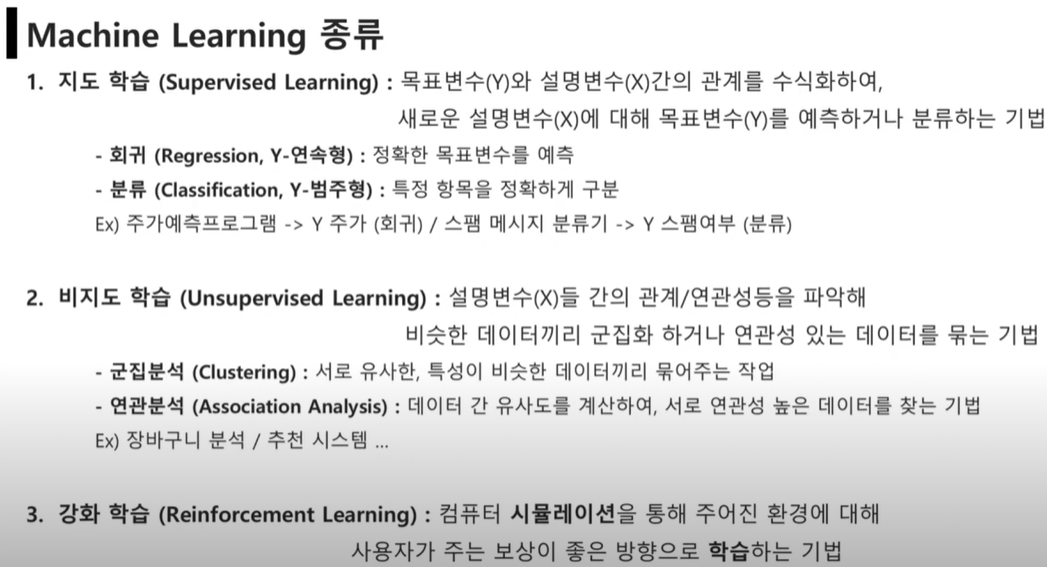

## - 지도학습 절차
1. 데이터 핸들링 (데이터 불러오기, 파생변수 생성, 이상치 제거 ...)
2. 회귀/분류 기법을 적용시킬 목표변수(Y)와 설명변수(X)를 설정
3. 학습데이터(TrainSet)와 검증 데이터(Test Set)를 분할
4. 학습 데이터를 이용해, 수식을 생성 (Modeling)
- 특성공학
- 학습 알고리즘
5.평가(Evaluation)
- 학습 능력 -> 학습 능력 평가 (Train Set)
- 일반화 -> 일반화 성능 평가 (Test Set)

## 기계학습

**PDA**

In [24]:
df1 = pd.read_csv('preprocessing_data.csv')
df1.head(3)

,Unnamed: 0,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,...,Flux480s,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Target,Error_message,target_binom,Chamber_Route
0,0,1,Oxidation,dry,1138.979159,O2,32.80,0.200,62.0,699.443,...,3.002593e+17,6.000007e+17,31574.410,102.847,885.0,154,96,none,0.0,route_11133
1,1,1,Oxidation,dry,1218.184551,O2,31.86,0.194,137.0,696.792,...,3.017903e+17,6.000012e+17,31580.213,104.323,919.0,154,102,none,0.0,route_11222
2,2,1,Oxidation,dry,1062.467808,O2,39.51,0.217,128.0,705.471,...,2.994231e+17,6.000002e+17,32162.414,100.605,916.0,155,95,none,0.0,route_11311


In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 60 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           752 non-null    int64  
 1   Ox_Chamber           752 non-null    int64  
 2   process              752 non-null    object 
 3   type                 752 non-null    object 
 4   Temp_OXid            752 non-null    float64
 5   Vapor                752 non-null    object 
 6   ppm                  752 non-null    float64
 7   Pressure             752 non-null    float64
 8   Oxid_time            752 non-null    float64
 9   thickness            752 non-null    float64
 10  No_Die               752 non-null    object 
 11  Reinforcement        752 non-null    bool   
 12  Unnamed: 0_x         752 non-null    int64  
 13  photo_soft_Chamber   752 non-null    int64  
 14  process 2            752 non-null    object 
 15  resist_target        752 non-null    flo

In [27]:
# 데이터 핸들링
# 1) 결측치 확인
df1.isnull().sum()

Unnamed: 0             0
Ox_Chamber             0
process                0
type                   0
Temp_OXid              0
Vapor                  0
ppm                    0
Pressure               0
Oxid_time              0
thickness              0
No_Die                 0
Reinforcement          0
Unnamed: 0_x           0
photo_soft_Chamber     0
process 2              0
resist_target          0
N2_HMDS                0
pressure_HMDS          0
temp_HMDS              0
temp_HMDS_bake         0
time_HMDS_bake         0
spin1                  0
spin2                  0
spin3                  0
photoresist_bake       0
temp_softbake          0
time_softbake          0
lithography_Chamber    0
Line_CD                0
UV_type                0
Wavelength             0
Resolution             0
Energy_Exposure        0
Range_check            0
Unnamed: 0_y           0
Etching_Chamber        0
Process 3              0
Temp_Etching           0
Source_Power           0
Selectivity            0


In [28]:
# Wafer 폐기여부를 판별하는 모델을 생성
df1['target_binom'].value_counts()

0.0    688
1.0     64
Name: target_binom, dtype: int64

In [29]:
df1.columns

Index(['Unnamed: 0', 'Ox_Chamber', 'process', 'type', 'Temp_OXid', 'Vapor',
       'ppm', 'Pressure', 'Oxid_time', 'thickness', 'No_Die', 'Reinforcement',
       'Unnamed: 0_x', 'photo_soft_Chamber', 'process 2', 'resist_target',
       'N2_HMDS', 'pressure_HMDS', 'temp_HMDS', 'temp_HMDS_bake',
       'time_HMDS_bake', 'spin1', 'spin2', 'spin3', 'photoresist_bake',
       'temp_softbake', 'time_softbake', 'lithography_Chamber', 'Line_CD',
       'UV_type', 'Wavelength', 'Resolution', 'Energy_Exposure', 'Range_check',
       'Unnamed: 0_y', 'Etching_Chamber', 'Process 3', 'Temp_Etching',
       'Source_Power', 'Selectivity', 'Thin Film 4', 'Thin Film 3',
       'Thin Film 2', 'Thin Film 1', 'Etching_rate', 'Chamber_Num', 'process4',
       'Flux60s', 'Flux90s', 'Flux160s', 'Flux480s', 'Flux840s',
       'input_Energy', 'Temp_implantation', 'Furance_Temp', 'RTA_Temp',
       'Target', 'Error_message', 'target_binom', 'Chamber_Route'],
      dtype='object')

In [31]:
Y = df1['target_binom']
# drop() : 데이터 프레임에서 불필요한 항목을 제거
X = df1.drop(columns=['Target', 'Error_message', 'target_binom', 'Chamber_Route','Unnamed: 0', 'Ox_Chamber','process', 'type','No_Die',
                      'Unnamed: 0_x', 'photo_soft_Chamber', 'process 2','Unnamed: 0_y', 'Etching_Chamber','Process 3','Chamber_Num', 'process4',
                     ])

In [33]:
X

,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,Reinforcement,resist_target,N2_HMDS,pressure_HMDS,...,Etching_rate,Flux60s,Flux90s,Flux160s,Flux480s,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp
0,1138.979159,O2,32.80,0.200,62.0,699.443,True,1.211940,13.891,15.025,...,2.75950,9.997373e+15,1.346079e+17,3.468281e+17,3.002593e+17,6.000007e+17,31574.410,102.847,885.0,154
1,1218.184551,O2,31.86,0.194,137.0,696.792,True,0.887720,14.722,15.059,...,2.72775,9.705928e+15,1.389326e+17,3.838008e+17,3.017903e+17,6.000012e+17,31580.213,104.323,919.0,154
2,1062.467808,O2,39.51,0.217,128.0,705.471,False,1.113156,19.205,14.964,...,2.67000,1.761358e+16,8.782248e+16,6.014497e+17,2.994231e+17,6.000002e+17,32162.414,100.605,916.0,155
3,1114.704773,O2,32.88,0.201,90.0,710.772,False,0.882195,16.368,14.944,...,2.74825,1.148303e+16,9.776566e+16,6.646884e+16,2.991354e+17,6.000003e+17,32874.925,101.739,911.0,156
4,989.411946,O2,38.11,0.204,98.0,716.975,False,0.834001,13.926,14.933,...,2.74625,9.769204e+15,1.222219e+17,2.496090e+17,3.005576e+17,6.000013e+17,30985.928,106.422,872.0,155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,1280.687973,H2O,45.19,0.214,21.0,708.586,False,0.923802,12.463,15.112,...,2.67450,1.813283e+16,1.763143e+17,1.026166e+18,2.995317e+17,5.999986e+17,32252.961,101.177,868.0,152
748,1275.153349,H2O,45.08,0.215,22.0,712.936,False,0.837348,19.767,14.910,...,2.72725,2.441931e+15,2.310319e+16,1.359659e+17,3.004926e+17,5.999991e+17,32253.818,100.736,868.0,151
749,1275.182502,H2O,45.10,0.214,21.0,715.498,False,0.859869,16.029,15.005,...,2.72275,1.054583e+16,9.513525e+16,6.272553e+17,3.009325e+17,6.000003e+17,32248.621,101.503,868.0,152
750,1268.105427,H2O,45.07,0.215,22.0,707.179,False,0.914315,17.587,14.949,...,2.69150,6.909171e+15,5.426149e+16,1.865029e+17,3.006733e+17,6.000003e+17,32241.426,101.061,867.0,152


In [40]:
# 숫자데이터만 선택
numeric_list = X.describe().columns.tolist()
X1 = X[numeric_list]

In [43]:
# 학습데이터와 검증데이터 분할
from sklearn.model_selection import train_test_split

In [51]:
# 학습데이터와 검증데이터를 8:2 비율로 분할
X_train, X_test, Y_train, Y_test = train_test_split(X1,Y,random_state=1234)
# random_state : 무작위 추출을 원하는 index로 맞추어 추출
print(X_train.shape)
print(X_test.shape)

(564, 39)
(188, 39)


In [55]:
# 학습 수행
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()